In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('../data/clean_data.csv', index_col='Municipality')
df.drop('missing_count', axis=1, inplace=True)

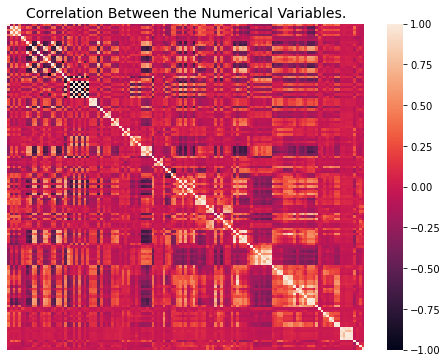

In [7]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, xticklabels=False, yticklabels=False, ax=ax)
plt.title('Correlation Between the Numerical Variables.', fontsize=14)
plt.savefig('../plots/corr.png')

In [8]:
# Split label from data
labels = df.filter(like='catalan').columns
df.loc[:, df.columns.isin(labels)].describe()

,culture_knowledge_of_catalan_speak
count,919.000000
mean,0.797635
std,0.088523
min,0.267603
25%,0.748330
50%,0.813527
75%,0.859326
max,1.000000


In [9]:
df = df.loc[:, ~df.columns.isin(labels)]

In [10]:
num_features = df.select_dtypes(include='number').columns
cat_features = df.select_dtypes(exclude='number').columns

In [11]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features),
    ],
    verbose_feature_names_out=False
)

In [12]:
preprocessed_data = preprocessor.fit_transform(df)
cols = preprocessor.get_feature_names_out()

In [13]:
pca = PCA()
pca_data = pca.fit_transform(preprocessed_data)
exp_var = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var)

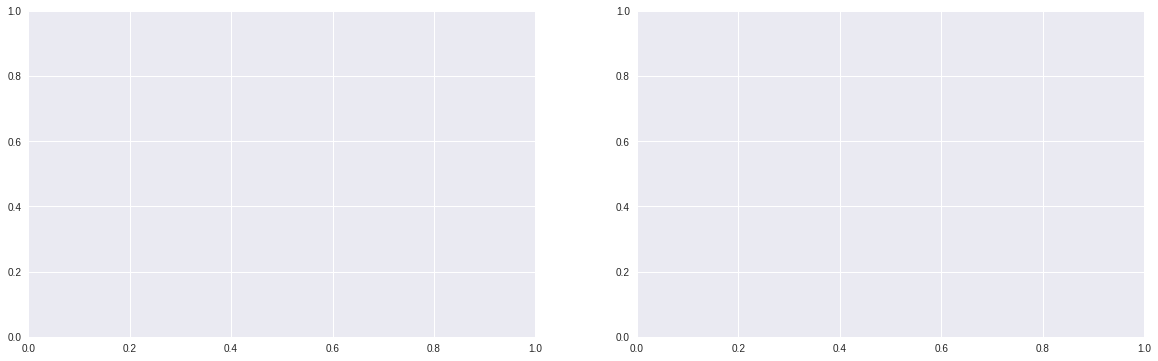

In [151]:
plt.style.use('seaborn')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

In [152]:
ax1.bar(range(0,len(exp_var)), exp_var, alpha=0.5, align='center', label='Individual explained variance')
ax1.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
ax1.set_ylabel('Explained variance ratio')
ax1.set_xlabel('Principal component index')

Text(0.5, 3.200000000000003, 'Principal component index')

In [153]:
components=25
exp_var_filtered = exp_var[0:components]
cum_sum_filtered = cum_sum_eigenvalues[0:components]
print('Cumulative explained variance:', round(cum_sum_filtered[components-1], 2))

ax2.bar(range(0,len(exp_var_filtered)), exp_var_filtered, alpha=0.5, align='center', label='Individual explained variance')
ax2.step(range(0,len(cum_sum_filtered)), cum_sum_filtered, where='mid',label='Cumulative explained variance')
ax2.set_ylabel('Explained variance ratio')
ax2.set_xlabel('Principal component index')
# ax2.legend(loc='best')
# plt.tight_layout()
# plt.show()

Cumulative explained variance: 0.78


Text(0.5, 3.200000000000003, 'Principal component index')

In [156]:
fig.suptitle('Cumulative Variance Explained by PCA', fontsize=18)
fig.savefig('../plots/pca_explain.png')
# plt.savefig('../plots/pca_explain.png')

In [59]:
loadings = pca.components_
num_pc = 25 #pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = cols
loadings_df = loadings_df.set_index('variable')
loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
variable,,,,,,,,,,,,,,,,,,,,,
territory__altitude,0.099751,0.088358,0.085707,0.078746,-0.038142,0.013934,-0.029846,0.104234,-0.119729,-0.125276,...,0.054002,-0.113155,0.074687,-0.007136,-0.003012,-0.008363,-0.013965,0.140188,-0.056031,0.091202
territory__longitude,-0.072997,0.116286,0.019215,-0.049116,-0.162548,0.086364,-0.076589,-0.058741,0.164866,-0.062469,...,-0.028303,0.075290,-0.112147,0.035165,0.098638,-0.093638,0.012410,-0.105530,-0.067411,-0.064528
territory__latitude,0.025035,0.119208,0.126072,-0.063190,-0.171939,0.091551,-0.105354,0.124502,0.023670,-0.130856,...,-0.067795,-0.001785,-0.088788,0.001772,0.003928,0.023378,-0.017507,0.053348,-0.021576,0.016474
territory__geographic_indicators_utm_coordinates_x_utm_coordinates_x,-0.072403,0.117388,0.020466,-0.048959,-0.163571,0.086957,-0.077404,-0.055644,0.163751,-0.063368,...,-0.028263,0.074776,-0.111925,0.035440,0.098022,-0.093062,0.012031,-0.104155,-0.067755,-0.063743
territory__geographic_indicators_utm_coordinates_y_utm_coordinates_y,0.026868,0.117582,0.127466,-0.063687,-0.170522,0.090703,-0.104948,0.126276,0.020819,-0.130755,...,-0.068894,-0.003116,-0.088164,0.000505,0.001618,0.026187,-0.018056,0.055567,-0.019822,0.017578


In [60]:
def top_dimensions(df, n=10):
    import pandas as pd
    
    top_df = pd.DataFrame()
    for col in df.columns:
        vars_ix = df.loc[:, col].apply(lambda x: abs(x)).sort_values(ascending=False)[0:n].index
        new_col = df.loc[vars_ix, col].sort_values(ascending=False).reset_index().apply(lambda x : '{} ({})'.format(x[0],x[1]), axis=1)
        top_df = pd.concat([top_df, pd.DataFrame(new_col, columns=[col])], axis=1)
        
    return top_df

In [64]:
pd.set_option('display.max_colwidth', 100)
top_df = top_dimensions(loadings_df, n=10)
top_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,elections_elections_to_the_european_parliament_electors (0.16492604210341522),labour_affiliations_to_social_security_according_to_contributor_s_residence_affiliations_to_soci...,population_population_by_place_of_birth_abroad (0.19215505105640932),labour_registered_unemployment_by_sectors_by_sectors_services (0.24587976886713753),economic_sectors_fleet_of_vehicles_total (0.2296373135895889),economic_sectors_fleet_of_vehicles_total (0.3947150412365381),labour_affiliations_to_general_system_according_to_location_of_affilation_by_sectors_total (0.35...,economic_sectors_used_agricultural_area_total (0.2434260711470681),main_aggregates_personal_resulting_quota_from_self_payment_by_declarer (0.21414460714049408),population_population_resident_abroad_on_1_january_women (0.21103679221748473),...,population_births_by_sex_total (0.46331946100372123),population_deaths_by_sex_total (0.3214011905728179),population_deaths_by_sex_men (0.28620247677291205),population_external_immigrations_by_place_of_origin_rest_of_eu (0.43443321439976573),environment_industrial_waste_industrial_waste (0.32819099723432454),economic_sectors_used_agricultural_area_permanent_pasture (0.24696462386981938),economic_sectors_housing_construction_housing_starts (0.4470313229793132),quality_of_life_type_of_dwellings_vacant (0.20850056531000663),economic_sectors_tourist_accommodation_campsite_places (0.2625219847880008),population_marriages_marriages_total (0.2979183165628479)
1,elections_elections_to_the_congress_of_deputies_electors (0.15888734650604433),labour_contributors_to_social_security_according_to_contributors_s_residence_contributors_to_soc...,main_aggregates_urban_property_tax_number_of_receipts (0.1902115194903328),labour_registered_unemployment_by_sex_registered_unemployment_total (0.22612733130949536),economic_sectors_fleet_of_vehicles_estate_cars (0.22693268433598124),economic_sectors_fleet_of_vehicles_estate_cars (0.3925138556726612),labour_affiliations_to_gen_system_according_to_location_of_affilation_s_general_system_according...,economic_sectors_used_agricultural_area_permanent_pasture (0.22975760886405378),main_aggregates_personal_taxable_base_by_declarer (0.20998403857988113),population_population_resident_abroad_on_1_january_total (0.2056112067902132),...,population_births_by_sex_girls (0.34444748180827484),economic_sectors_tourist_accommodation_campsite_places (0.2858883285901772),population_deaths_by_sex_total (0.27730656231420925),population_external_migrations_external_immigrations_immigrations (0.358790065799357),labour_affiliations_to_gen_system_according_to_location_of_affilation_s_general_system_according...,population_births_by_sex_girls (0.21805082326986527),economic_sectors_land_ownership_without_land (0.23408937494488605),culture_libraries_others (0.17102143395399888),main_aggregates_urban_property_tax_taxable_base_by_receipt (0.21798979677864783),population_study_reasons_students_who_study_in_the_same_municipality (0.28734664079423294)
2,population_men_population_from_65_to_84_years (0.155552912920326),labour_contributors_to_social_security_according_to_contributors_s_residence_contributors_to_soc...,population_population_by_nationality_foreign (0.18309762108598465),labour_registered_unemployment_by_sectors_registered_unemployment_total (0.22611691804292045),economic_sectors_fleet_of_vehicles_others (0.22618241707648493),economic_sectors_fleet_of_vehicles_industrial_vehicles (0.3823845748178627),labour_affiliations_to_gen_system_according_to_location_of_affilation_s_general_system_according...,economic_sectors_livestock_ownership_with_livestock (0.22409921544197675),main_aggregates_urban_property_tax_taxable_base_by_receipt (0.2054199970138174),population_population_resident_abroad_on_1_january_men (0.18243154015583385),...,population_births_by_sex_boys (0.3353451279705165),population_deaths_by_sex_men (0.2504803592613197),population_dens

In [65]:
def get_main(str):
    main = str.split('_', 1)[0]
    return main

tdf = top_df.applymap(get_main)
tdf = tdf.apply(pd.Series.value_counts)
tdf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
culture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN
economic,2.0,NaN,1.0,NaN,5.0,5.0,NaN,3.0,2.0,4.0,...,NaN,2.0,NaN,2.0,NaN,2.0,3.0,1.0,5.0,2.0
education,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0
elections,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
environment,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN
labour,NaN,4.0,NaN,5.0,NaN,2.0,7.0,NaN,2.0,1.0,...,NaN,NaN,NaN,1.0,5.0,2.0,2.0,1.0,1.0,3.0
main,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
population,5.0,3.0,7.0,5.0,2.0,NaN,1.0,4.0,1.0,3.0,...,10.0,6.0,10.0,5.0,3.0,5.0,4.0,3.0,1.0,3.0
quality,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
territory,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


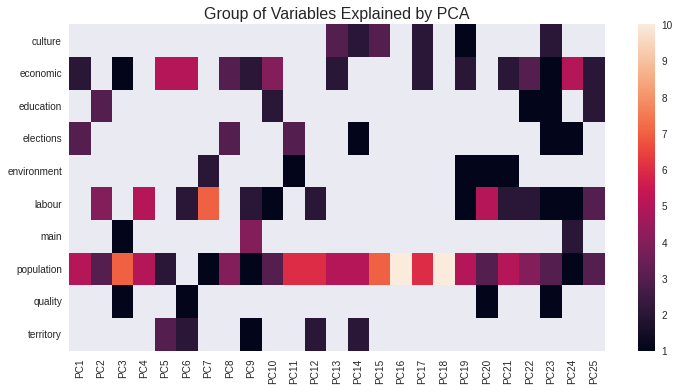

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(tdf, annot=False)
plt.title('Group of Variables Explained by PCA', fontsize=16)
plt.savefig('../plots/pca_groups.png')

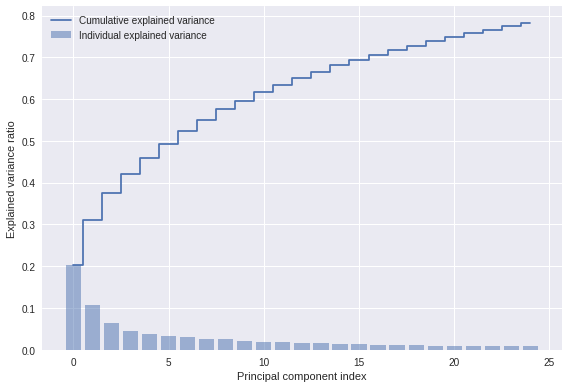

In [75]:
pca = PCA(25)
pca_data = pca.fit_transform(preprocessed_data)
exp_var = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var)

plt.bar(range(0,len(exp_var)), exp_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Clustering

### KMeans

In [114]:
num_pc = pca.n_components_
red_df = pd.DataFrame(data=pca_data, index=df.index, columns=["PC"+str(i) for i in list(range(1, num_pc+1))])
# red_df.to_csv('../data/model_data.csv')

In [115]:
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

index= pd.MultiIndex.from_arrays([['kmeans'], [2]], names=('model', 'param (k/d)'))
results_df = pd.DataFrame(index=index, columns=['CH score', 'Silhouette score', 'DB score'])

def compute_clustering(K, df, results, method='affinity'):
    data = df.copy()
    # Train the model
    if method == 'kmeans':
        cluster = KMeans(n_clusters=K, max_iter=100)
        cluster.fit(data);
    elif method == 'affinity':
        cluster = AffinityPropagation(damping=k)
        cluster.fit(data);
    else:
        return 'Method not recognized'
    
    data['cluster_labels'] = cluster.labels_
    
    # Compute metrics
    CH = calinski_harabasz_score(data, cluster.labels_)
    S = silhouette_score(data, cluster.labels_ )
    DB = davies_bouldin_score(data, cluster.labels_ )
    
    results.loc[(method, K),:] = [CH,S,DB]
    return results

In [116]:
for k in [2, 5, 10, 15, 20]:
    results = compute_clustering(k, red_df, results_df, method='kmeans')

for k in [0.5, 0.6, 0.7, 0.8, 0.9]:
    compute_clustering(k, red_df, results_df, method='affinity')

results_df

CH score Silhouette score  DB score
model    param (k/d)                                       
kmeans   2.0          212.694486         0.223971   1.90977
         5.0          123.807008         0.133404  1.823368
         10.0         100.510963         0.170702  1.662049
         15.0          95.781744         0.184818  1.594023
         20.0           93.15419         0.173983  1.548832
affinity 0.5          196.116507         0.264697  1.045949
         0.6           193.14229         0.294345  1.047724
         0.7          202.855829         0.270011  1.044248
         0.8          206.088927         0.293346  1.025176
         0.9          207.313401         0.288875  1.059372

Based on large CH,  Silh closeness to 1, and DB close to 0 the best option is affinity with damping=0.5.

In [159]:
cluster = AffinityPropagation(damping=0.9)
cluster.fit(red_df)
aux = red_df.copy()
aux['cluster_label'] = cluster.labels_
len(aux['cluster_label'].unique())

80

In [132]:
cluster = KMeans(n_clusters=5)
cluster.fit(red_df)

KMeans(n_clusters=5)

In [133]:
aux = red_df.copy()
aux['cluster_label'] = cluster.labels_

In [134]:
aux['cluster_label'].unique()

array([2, 1, 0, 4, 3], dtype=int32)

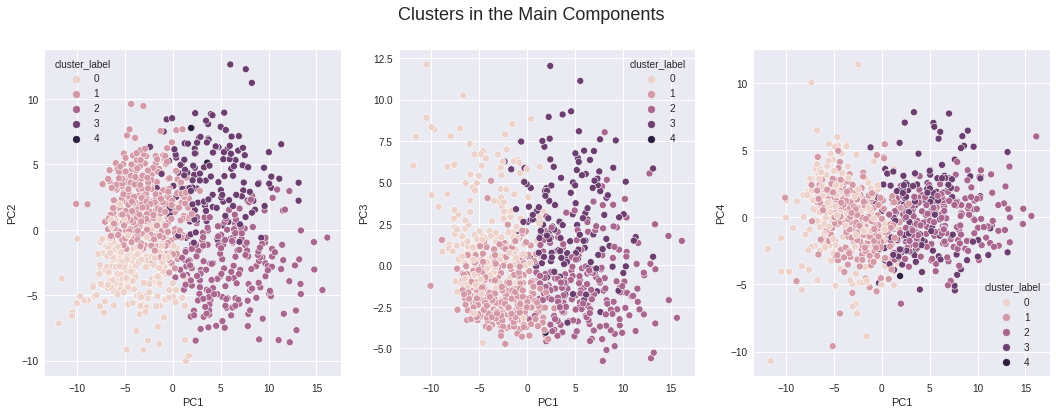

In [148]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
sns.scatterplot(x=aux['PC1'], y=aux['PC2'], hue=aux['cluster_label'], ax=ax1)
sns.scatterplot(x=aux['PC1'], y=aux['PC3'], hue=aux['cluster_label'], ax=ax2)
sns.scatterplot(x=aux['PC1'], y=aux['PC4'], hue=aux['cluster_label'], ax=ax3)
fig.suptitle('Clusters in the Main Components', fontsize=18)
plt.savefig('../plots/clusters.png')